<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Clustering/KMean%20-%20Heirarchical%20Clustering/classify_wheather_it_decrease_or_increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [15]:
!ls

gdrive	sample_data


In [0]:
df = pd.read_csv('gdrive/My Drive/stock_data.csv')

In [17]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,Y
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1
1,91.567862,96.621901,98.084599,96.543909,91.678881,96.337918,96.1250,94.015957,94.409201,97.084183,...,96.888889,95.499022,97.457971,99.282297,101.296698,98.310678,100.489134,99.602234,93.263158,-1
2,92.908600,97.640753,103.112398,98.130312,78.041958,97.693843,95.6250,95.744681,94.089712,96.655229,...,97.333333,96.379804,93.397222,100.478469,101.179953,98.141624,96.084839,99.204467,86.421053,1
3,84.869178,94.369892,109.018217,102.209632,73.357203,100.676878,96.9166,93.085106,98.243067,98.113343,...,101.925926,95.988415,94.412410,100.956938,99.287025,102.027024,100.326263,103.985313,77.513179,1
4,88.888889,95.603221,108.459686,103.116147,77.832727,104.677398,100.8750,93.617021,100.000000,99.828542,...,102.074074,102.152642,105.579469,106.937799,101.651101,103.884995,106.688139,108.525205,85.736842,1


In [18]:
df.shape

(3000, 101)

In [19]:
X = df.drop('Y', 1)
X.shape

(3000, 100)

In [20]:
y = df.Y.values
y.shape

(3000,)

# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2100, 100), (900, 100), (2100,), (900,))

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

In [0]:
from sklearn.tree import DecisionTreeClassifier

LR: 0.491000 (0.026627)
LDA: 0.487000 (0.022728)
KNN: 0.497000 (0.037311)
CART: 0.474000 (0.032035)
NB: 0.501000 (0.033067)
SVM: 0.489333 (0.037172)


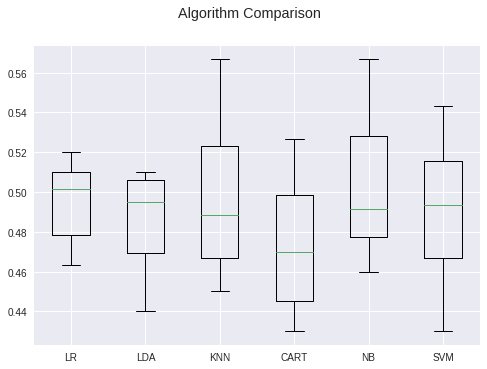

In [28]:
def bestClassifier(X, y):
  import matplotlib.pyplot as plt
  from sklearn import model_selection
  from sklearn.model_selection import cross_val_score
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  from sklearn.naive_bayes import GaussianNB
  from sklearn.svm import SVC 
  # prepare configuration for cross validation test harness
  seed = 7
  # prepare models
  models = []
  models.append(('LR', LogisticRegression()))
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('SVM', SVC()))
  # evaluate each model in turn
  results = []
  names = []
  scoring = 'accuracy'
  for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
  # boxplot algorithm comparison
  fig = plt.figure()
  fig.suptitle('Algorithm Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()
bestClassifier(X, y)

In [0]:
from sklearn.linear_model import LogisticRegression

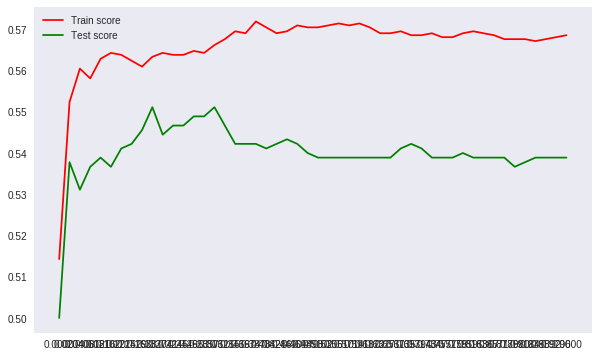

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0.00001, 1, 50)
train_s = []
test_s = []
for i in x:
  model = LogisticRegression(C = i)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

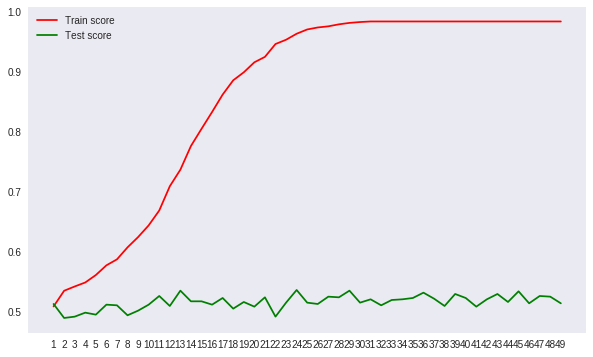

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
x = range(1, 50)
train_s = []
test_s = []
for i in x:
  model = DecisionTreeClassifier(max_depth = i)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

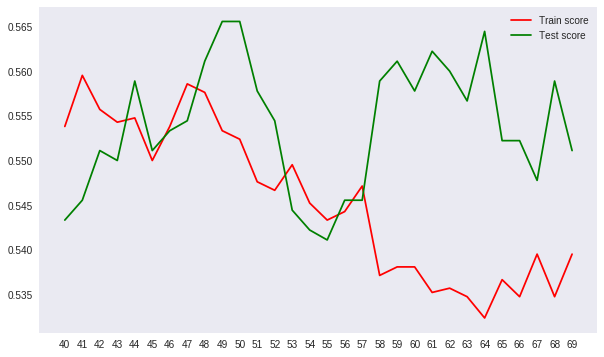

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
x = range(40, 70)
train_s = []
test_s = []
for i in x:
  model = KNeighborsClassifier(i)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

In [0]:
X_transformed = sc.fit_transform(X)

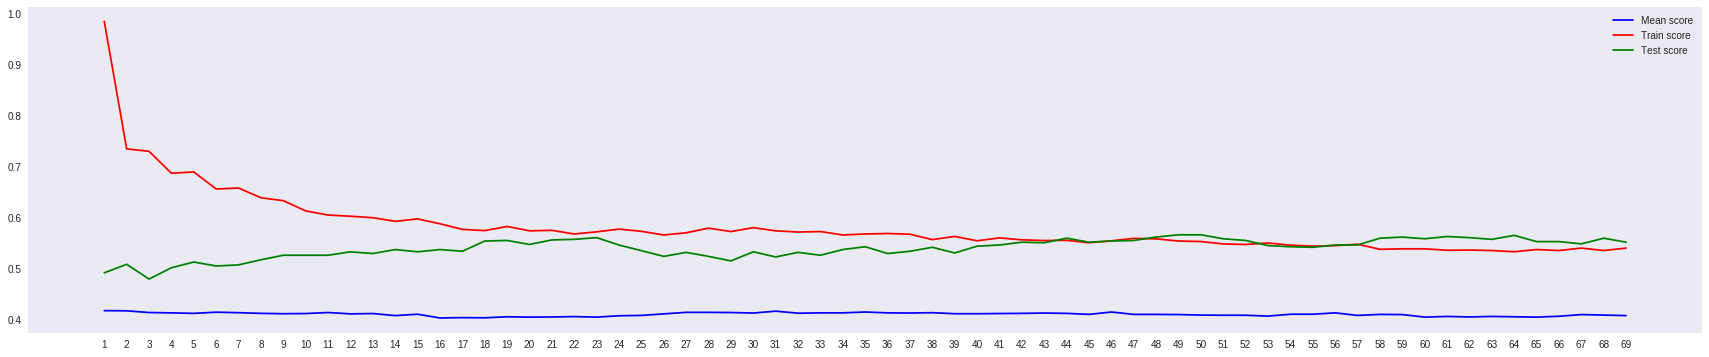

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
x = range(1, 70)
mean_score = []
train_s = []
test_s = []
std = []
for i in x:
  model = KNeighborsClassifier(i)
  cv = cross_val_score(model, X, y, cv = 10)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  std.append(cv.std())
  mean = np.mean(cv)
  mean_score.append(mean)
  
plt.figure(figsize = (30, 6))
plt.plot(x, mean_score, c = 'b', label = 'Mean score')
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
#plt.plot(x, std, c = 'g', label = 'Variance')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

# Clustering

## Heirarchical cluster

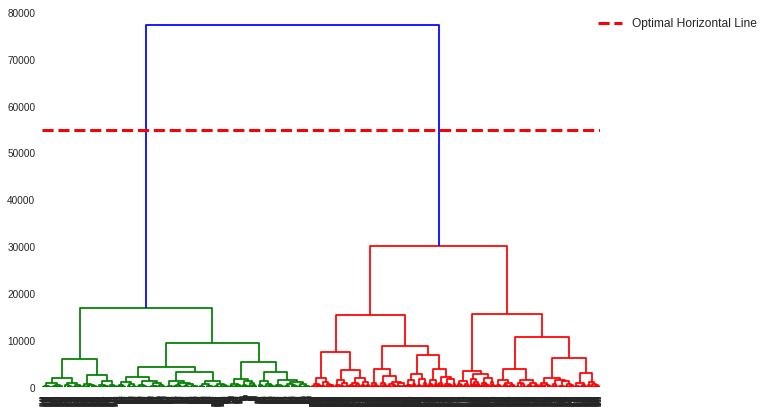

In [57]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 55000, linewidth=3, color='r',linestyle = '--', label = 'Optimal Horizontal Line')
plt.plot(())
#method = ward means we are minimizing the variance between clusters, before in k-means  cluster we are minimze the WCSS**
plt.legend(bbox_to_anchor = (1.3, 1), fontsize = 'large')
plt.show()

## KmeanCluster

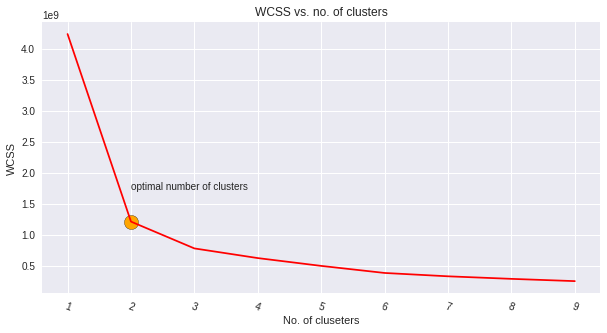

In [60]:
from sklearn.cluster import KMeans
def optimal_clusters(X, step_size = 1, slope_threshold = 0.4 , end_point = 10):
  import numpy as np
  wcss = []
  #choose the step size for n_clusters
  Range = range(1, end_point, step_size)
  for i in Range:
    model = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    #fit the model
    model.fit(X)

    #calculate wcss
    wcss_this_cluster = model.inertia_
    wcss.append(wcss_this_cluster)

  #select optimal number of clusters
  for i in range(len(wcss) - 1):
    #calculate slope of line
    slope = ((wcss[i] - wcss[i + 1])/step_size)/np.mean(wcss)
    if slope > slope_threshold:
      optimal_clusters, wcss_optimal = Range[i + 1], wcss[i+1]

  plt.figure(figsize = (10, 5))
  plt.plot(Range, wcss, c = 'r')
  plt.scatter(optimal_clusters, wcss_optimal, c = 'orange', s = 200, edgecolors = 'black')
  plt.annotate('optimal number of clusters',(optimal_clusters, wcss_optimal + 2 * min(wcss)))
  plt.title('WCSS vs. no. of clusters')
  plt.xlabel('No. of cluseters')
  plt.ylabel('WCSS')
  plt.xticks(Range, rotation = -20)
  #plt.grid()
  plt.show()
  return optimal_clusters, wcss_optimal

optimal_clusters, wcss_optimal = optimal_clusters(X, slope_threshold = 0.5)

In [0]:
optimal_cluster = 2

In [62]:
model = KMeans(2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
X_train_cls = model.fit_transform(X_train)
X_test_cls = model.transform(X_test)

In [72]:
X_train_cls[0][:2]

array([11.87063196,  5.72148409])

In [73]:
X_train_cls.shape

(2100, 2)

In [74]:
X_test_cls.shape

(900, 2)

In [0]:
X_cls = model.fit_transform(X)

In [76]:
X_cls.shape

(3000, 2)

LR: 0.490667 (0.036417)
LDA: 0.490000 (0.036484)
KNN: 0.497000 (0.020518)
CART: 0.489000 (0.023000)
NB: 0.515333 (0.035471)
SVM: 0.487000 (0.035729)


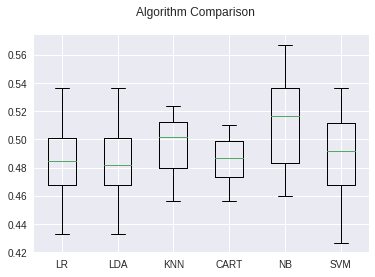

In [77]:
bestClassifier(X_cls, y)